In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [3]:
!pip install -U openmim
# Install mmengine
!mim install mmengine
# Install MMCV
!pip install mmcv==2.0.0rc4 -f https://download.openmmlab.com/mmcv/dist/cu117/torch1.13/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13/index.html


In [4]:
!rm -rf mmsegmentation
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16493, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16493 (delta 68), reused 118 (delta 65), pack-reused 16328
Receiving objects: 100% (16493/16493), 43.85 MiB | 30.22 MiB/s, done.
Resolving deltas: 100% (11448/11448), done.
/content/mmsegmentation
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation


In [6]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.13.1+cu117 True
1.2.2


In [8]:
#!pip install ftfy
import ftfy

In [9]:
# Download config and checkpoint files
!mim download mmsegmentation --config fastfcn_r50-d32_jpu_aspp_4xb2-80k_cityscapes-512x1024 --dest .

processing fastfcn_r50-d32_jpu_aspp_4xb2-80k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.6/335.6 MiB 31.3 MB/s eta 0:00:00
Successfully downloaded fastfcn_r50-d32_jpu_aspp_4x4_512x1024_80k_cityscapes_20210924_214357-72220849.pth to /content/mmsegmentation
Successfully dumped fastfcn_r50-d32_jpu_aspp_4xb2-80k_cityscapes-512x1024.py to /content/mmsegmentation


/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/mmsegmentation/fastfcn_r50-d32_jpu_aspp_4x4_512x1024_80k_cityscapes_20210924_214357-72220849.pth


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


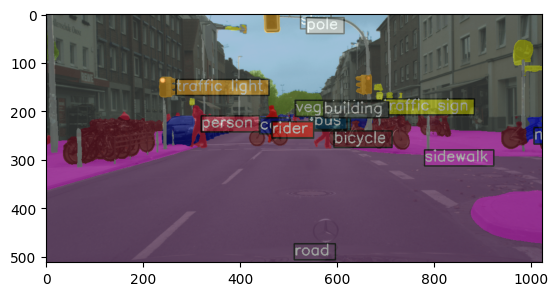

In [10]:
#!pip install mmdet
import torch
import matplotlib.pyplot as plt
from mmengine import Config
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Config dosyasını yükle
cfg = Config.fromfile('/content/mmsegmentation/fastfcn_r50-d32_jpu_aspp_4xb2-80k_cityscapes-512x1024.py')

# Modeli yükle
model = init_model(cfg, checkpoint='/content/mmsegmentation/fastfcn_r50-d32_jpu_aspp_4x4_512x1024_80k_cityscapes_20210924_214357-72220849.pth')

# Görüntüyü yükle
img='/content/mmsegmentation/demo/demo.png'
result = inference_model(model, img)

# show the results
vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)